<a href="https://colab.research.google.com/github/charlesyoo/2023-Predictive-Analytics/blob/main/diamond_xgbr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Task 1: Define the Problem


Analze the following diamond data set & provide an explanation detailing why a particular model was chosen.

# Task 2: Install & Import the Needed Libraries & Packages

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn import metrics

import pickle

sns.set()

#Task 3: Load the Data

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/charlesyoo/ML-Data/main/diamonds.csv')

#Task 4: Perform Data Exploratory Analysis (EDA)

In [38]:
#Show the data
data.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_numeric,clarity_numeric,color_numeric
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5,2,6
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,4,3,6


In [39]:
#Show the colums
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'cut_numeric', 'clarity_numeric', 'color_numeric'],
      dtype='object')

In [40]:
#Find missing values
data.isnull().sum()

carat              0
cut                0
color              0
clarity            0
depth              0
table              0
price              0
x                  0
y                  0
z                  0
cut_numeric        0
clarity_numeric    0
color_numeric      0
dtype: int64

In [7]:
data.shape

(53940, 10)

In [8]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [9]:
data['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [10]:
data['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [11]:
data['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

#Task 5: Perform Data Cleaning

In [12]:
#Mapping the cut column

cut_mapping = {'Ideal': 5, 'Premium': 4, 'Very Good': 3, 'Good': 2, 'Fair': 1}

In [13]:
data['cut_numeric'] = data['cut'].map(cut_mapping)

In [14]:
#creating clarity mapping

clarity_mapping = {'IF': 8, 'VVS1': 7, 'VVS2': 6, 'VS1': 5, 'VS2': 4, 'SI1': 3, 'SI2': 2, 'I1': 1}

In [15]:
data['clarity_numeric'] = data['clarity'].map(clarity_mapping)

In [41]:
# creating color_mapping

color_mapping = {'D': 7, 'E': 6, 'F': 5, 'G': 4, 'H': 3, 'I': 2, 'J': 1}

In [42]:
# Adding the new column with the mapped values
data['color_numeric'] = data['color'].map(color_mapping)

In [18]:
clarity_counts = data['clarity'].value_counts()
print(clarity_counts)

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64


In [19]:
cut_counts = data['cut'].value_counts()
print(cut_counts)

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64


In [20]:
color_counts = data['color'].value_counts()
print(color_counts)

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64


In [21]:
print("\nAfter mapping:")
print(data[['cut', 'cut_numeric']].head())


After mapping:
       cut  cut_numeric
0    Ideal            5
1  Premium            4
2     Good            2
3  Premium            4
4     Good            2


In [22]:
data.describe()

,carat,depth,table,price,x,y,z,cut_numeric,clarity_numeric,color_numeric
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734,3.904097,4.051020,4.405803
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699,1.116600,1.647136,1.701105
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,3.000000,3.000000,3.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,4.000000,4.000000,4.000000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,5.000000,5.000000,6.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,5.000000,8.000000,7.000000


In [23]:
# Storing the wrangled data to model & test
df = data[['carat', 'depth', 'table', 'cut_numeric', 'clarity_numeric', 'color_numeric','price']]

In [24]:
df.head()

,carat,depth,table,cut_numeric,clarity_numeric,color_numeric,price
0,0.23,61.5,55.0,5,2,6,326
1,0.21,59.8,61.0,4,3,6,326
2,0.23,56.9,65.0,2,5,6,327
3,0.29,62.4,58.0,4,4,2,334
4,0.31,63.3,58.0,2,2,1,335


#Task 6: Visualize Cleaned up Dataset

<Axes: xlabel='cut_numeric', ylabel='price'>

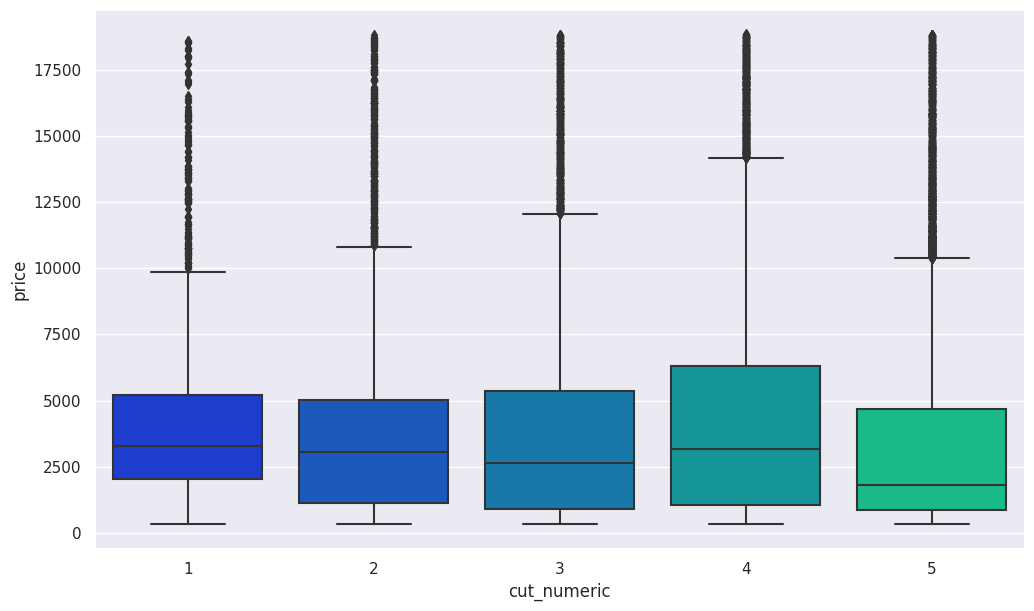

In [33]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='cut_numeric', y='price', data=df, palette='winter')

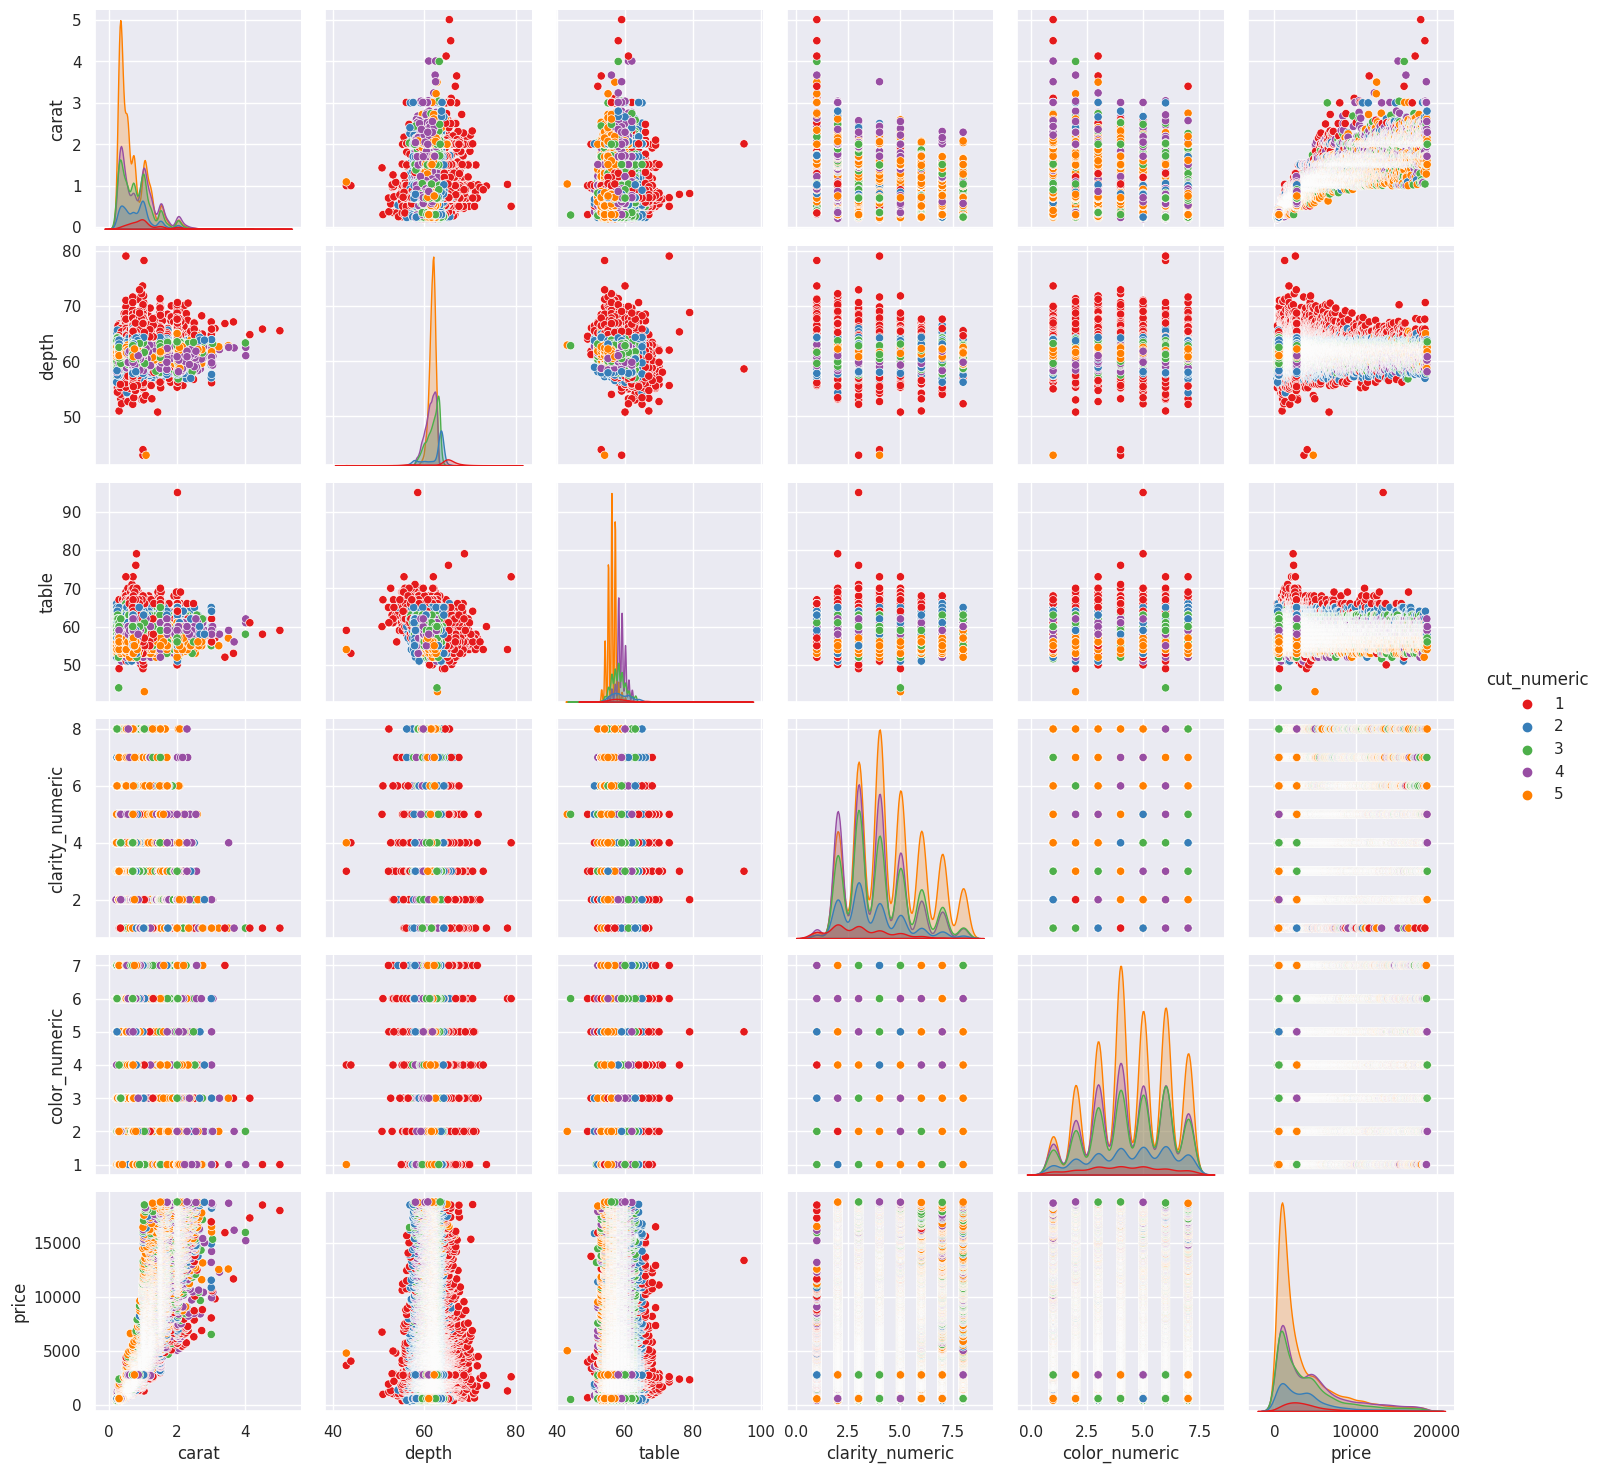

In [34]:
sns.pairplot(df,hue='cut_numeric',palette='Set1')

In [59]:
agg_df = df.groupby('cut_numeric')['price'].agg(['count', 'mean']).reset_index()

<Axes: xlabel='cut_numeric', ylabel='mean'>

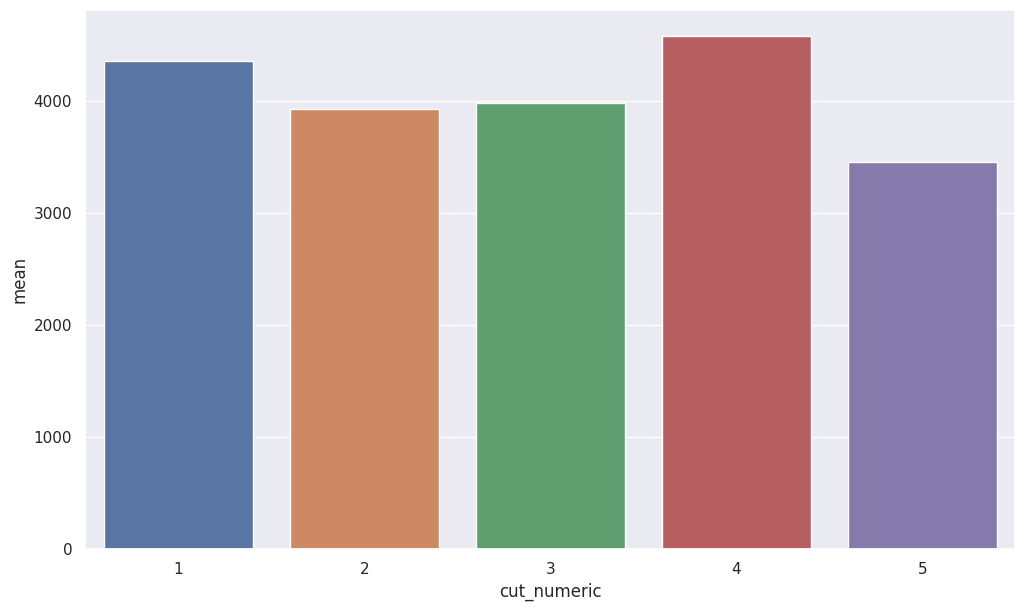

In [36]:
plt.figure(figsize=(12, 7))
sns.barplot(x='cut_numeric', y='mean', data=agg_df)

<Axes: xlabel='carat', ylabel='price'>

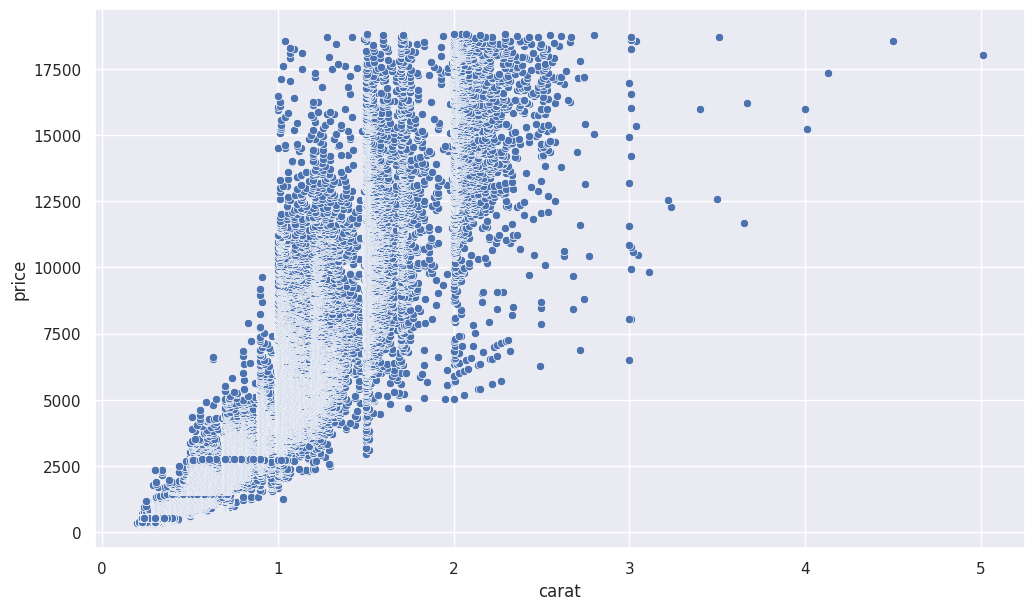

In [37]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x='carat', y='price', data=df)

In [24]:
x = df[['carat', 'depth', 'table', 'cut_numeric', 'clarity_numeric', 'color_numeric']].values
y = df['price'].values

In [25]:
type(x)
type(y)

numpy.ndarray

#Task 8: Perform Data-Split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state=35)

In [27]:
print(f'The shpe of the data is: \nx_train: \t{x_train.shape} \nx_test: \t{x_test.shape} \ny_train: \t{y_train.shape} \ny_test: \t{y_test.shape}')

The shpe of the data is: 
x_train: 	(48546, 6) 
x_test: 	(5394, 6) 
y_train: 	(48546,) 
y_test: 	(5394,)


#Task 9: Choose the ML Method to follow

In [28]:
LinearRegression_model = LinearRegression()
DecisionTree_model = DecisionTreeRegressor()
RandomForest_model = RandomForestRegressor()
XGBRegressor_model = XGBRegressor()

#Task 10: Train the ML Model

In [29]:
models = [LinearRegression_model, DecisionTree_model, RandomForest_model, XGBRegressor_model]
for model in models:
  model.fit(x_train, y_train)
  print(f'{model} is trained!')

LinearRegression() is trained!
DecisionTreeRegressor() is trained!
RandomForestRegressor() is trained!
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) is trained!


In [30]:
accuracy_LinearRegression = LinearRegression_model.score(x_test, y_test)
accuracy_DecisionTree = DecisionTree_model.score(x_test, y_test)
accuracy_RandomForest = RandomForest_model.score(x_test, y_test)
accuracy_XGBRegressor = XGBRegressor_model.score(x_test, y_test)

In [31]:
models = {'LinearRegression_model': accuracy_LinearRegression, 'DecisionTree_model': accuracy_DecisionTree, 'RandomForest_model': accuracy_RandomForest,
          'XGBRegressor_model': accuracy_XGBRegressor}
for model, score in models.items():
  print(f'The accuracy score for the {model} is {round(score*100, 2)}%')

The accuracy score for the LinearRegression_model is 89.82%
The accuracy score for the DecisionTree_model is 96.92%
The accuracy score for the RandomForest_model is 98.06%
The accuracy score for the XGBRegressor_model is 97.97%


I chose the XGBoost Regressor model because of the concern over overfitting for Decision Tree & Random Forest. 97.97 is very good.

#Task 11: Test the Model

In [37]:
test_x = np.zeros((1,6))
test_x

array([[0., 0., 0., 0., 0., 0.]])

In [38]:
# test_x = np.zeros((1, 6)

# test_x[0, 0] = 2.23     # carat
# test_x[0, 1] = 61.5     # depth
# test_x[0, 2] = 55.0     # table
# test_x[0, 3] = 3        # cut_numeric
# test_x[0, 4] = 6        # clarity_numeric
# test_x[0, 5] = 5        # color_numeric
# test_x

test_x = np.zeros((1, 6))

test_x[0, 0] = 2.75     # carat
test_x[0, 1] = 55.3     # depth
test_x[0, 2] = 52.1     # table
test_x[0, 3] = 4        # cut_numeric
test_x[0, 4] = 5        # clarity_numeric
test_x[0, 5] = 5        # color_numeric
test_x

array([[ 2.75, 55.3 , 52.1 ,  4.  ,  5.  ,  5.  ]])

In [39]:
prediction = XGBRegressor_model.predict(test_x)
round(np.int64(prediction[0]), 2)

17635

In [40]:
XGB_mdl_file = '/content/drive/MyDrive/A Predictive Analytics Folder/Projects/Diamonds'

In [41]:
with open('XGB_mdl_file','wb') as file:
  model = pickle.dump(XGBRegressor_model, file)